# Predicting the sale price of bulldozers using machine learning

## Problem definition:
> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import training and validation data
df = pd.read_csv('./data/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#kinda big
len(df)

412698

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

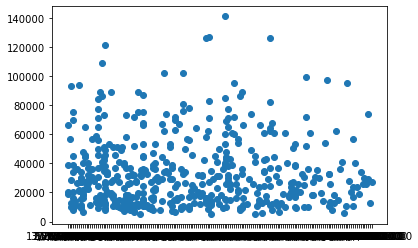

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:500], df.SalePrice[:500]);

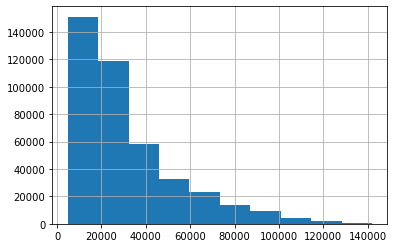

In [7]:
df.SalePrice.hist();

In [8]:
# parsing dates
df = pd.read_csv('./data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

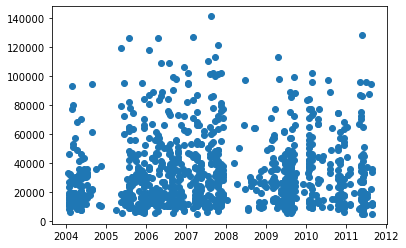

In [10]:
#dates are formatted properly
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
#sort df by saledate (oldest -> newest)
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
#make a copy of df
df_tmp = df.copy()
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [14]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.day_of_week
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.day_of_year

In [15]:
#remove saledate columnm
df_tmp.drop('saledate', axis=1, inplace=True)

In [16]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modelling

In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [18]:
### Fix missing data


In [19]:
### Fix strings in df
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
#pandas treats categories as numbers
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [22]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [23]:
# save data to csv
df_tmp.to_csv('train_tmp.csv', index=False)

In [24]:
df_temp = pd.read_csv('./train_tmp.csv', low_memory=False)

In [25]:
#fix numeric missing values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label + '_is_missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())
        

In [26]:
#fix non numeric missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label + '_is_missing'] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1

In [27]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [28]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, #use all cpu cores(a lot of data)
                              random_state=42) # is like np.random.seed(42)

In [47]:
#split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train.SalePrice

X_valid = df_val.drop('SalePrice', axis=1)
y_valid = df_val.SalePrice

In [31]:
%%time
model.fit(X_train, y_train);

CPU times: user 16min 24s, sys: 3.83 s, total: 16min 28s
Wall time: 1min 28s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {"training MAE":mean_absolute_error(y_train, train_preds),
             "valid MAE":mean_absolute_error(y_valid, val_preds),
             "training RMSLE":rmsle(y_train, train_preds),
             "valid RMSLE": rmsle(y_valid, val_preds),
             "training r2": model.score(X_train, y_train),
             "valid r2": model.score(X_valid, y_valid)
             }
    
    return scores

In [40]:
%%time
### Testing model on subset
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

model.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 268 ms, total: 30.8 s
Wall time: 4.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [57]:
show_scores(model)

{'training MAE': 5561.2988092240585,
 'valid MAE': 7177.26365505919,
 'training RMSLE': 0.257745378256977,
 'valid RMSLE': 0.29362638671089003,
 'training r2': 0.8606658995199189,
 'valid r2': 0.8320374995090507}

In [61]:
%%time
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, 'sqrt', 'auto'],
    "max_samples": [10000]
}

rmscv_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), 
                                 param_distributions=grid,
                                 n_iter=5, #try 100
                                 cv=5, 
                                 verbose=True)

rmscv_model.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 44.7 s, sys: 3.26 s, total: 48 s
Wall time: 54.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [63]:
rmscv_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [62]:
show_scores(rmscv_model)

{'training MAE': 7706.112178123888,
 'valid MAE': 9198.363176541254,
 'training RMSLE': 0.3411829502226047,
 'valid RMSLE': 0.3723510149160531,
 'training r2': 0.7528589380224604,
 'valid r2': 0.7460084103553668}

In [67]:
%%time
### try model with best hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                     min_samples_leaf=1,
                                     min_samples_split=14,
                                     max_features=0.5,
                                     n_jobs=-1,
                                     max_samples=None,
                                     random_state=42
                                     )
    
ideal_model.fit(X_train, y_train);

CPU times: user 3min 24s, sys: 627 ms, total: 3min 25s
Wall time: 20.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [68]:
#r2 0.95!
#rmsle 0.24!
show_scores(ideal_model)

{'training MAE': 2953.8161137163484,
 'valid MAE': 5951.247761444453,
 'training RMSLE': 0.14469006962371858,
 'valid RMSLE': 0.2452416398953833,
 'training r2': 0.9588145522577225,
 'valid r2': 0.8818019502450094}

In [76]:
df_test = pd.read_csv('./data/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [70]:
#preprocessing the data
def preprocess_data(df):
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.day_of_week
    df['saleDayOfYear'] = df.saledate.dt.day_of_year
    
    df.drop('saledate', axis=1, inplace=True)
    
    ### Fix strings in df
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
    
        #fix numeric missing values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + '_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
        #fix non numeric missing values
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [77]:
df_test = preprocess_data(df_test)

In [79]:
df_test['auctioneerID_is_missing'] = False

In [83]:
#make prediction on test dataset
test_preds = ideal_model.predict(df_test)
test_preds

/home/a1ds/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [86]:
# format predictions for kaggle
formatted_predictions_df = pd.DataFrame({"SalesID": df_test.SalesID, "SalesPrice": test_preds})
formatted_predictions_df[:10]

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
5,1227870,35620.622347
6,1227871,28830.301283
7,1227879,11735.682316
8,1227880,25362.913709
9,1227881,35525.482587


In [88]:
#export results
formatted_predictions_df.to_csv('price_prediction_for_each_sale.csv')

In [91]:
#feature importance
feature_importance = ideal_model.feature_importances_

In [116]:
def plott_feature_importance(columns, importances, n=20):
    df = (pd.DataFrame({
        'features': columns, 
        "feature_importances": importances}
    ).sort_values('feature_importances', ascending=False).reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(11,6))
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('features')
    ax.set_xlabel('feature importance')
    ax.invert_yaxis()
    ax.title.set_text('Most important features')

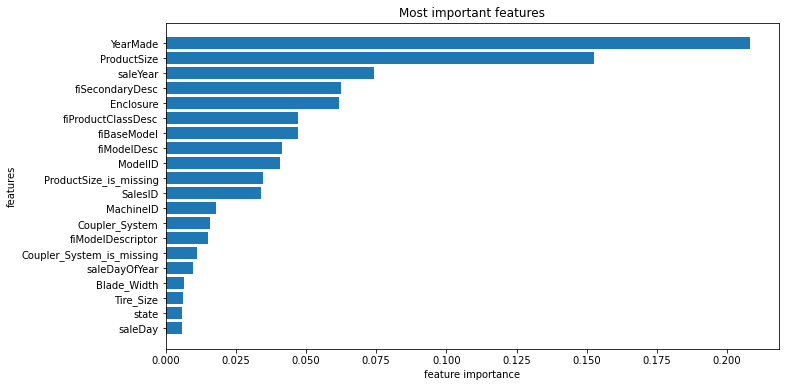

In [117]:
plott_feature_importance(X_train.columns, feature_importance)